In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

In [2]:
datadir = "/root/codespace/quant-finance-lectures/amarstock_adjusted_data/daily"
print(get_top20_stocks(path=datadir))

[('00DS30', 3084026774000.0), ('00DSES', 2132060774800.0), ('00DSEX', 3370925421616.0), ('1JANATAMF', 233585572.0), ('1STPRIMFMF', 332978314.0), ('AAMRANET', 148017730.0), ('AAMRATECH', 683394625.0), ('ABB1STMF', 256367920.0), ('ABBANK', 769581974.0), ('ACFL', 104802917.0), ('ACI', 94419722.0), ('ACIFORMULA', 126512844.0), ('ACMELAB', 53292422.0), ('ACTIVEFINE', 848206734.0), ('ADNTEL', 51799485.0), ('ADVENT', 237026778.0), ('AFCAGRO', 336544932.0), ('AFTABAUTO', 297630571.0), ('AGNISYSL', 567261957.0), ('AGRANINS', 25712648.0)]


### Sharpe Ratio 

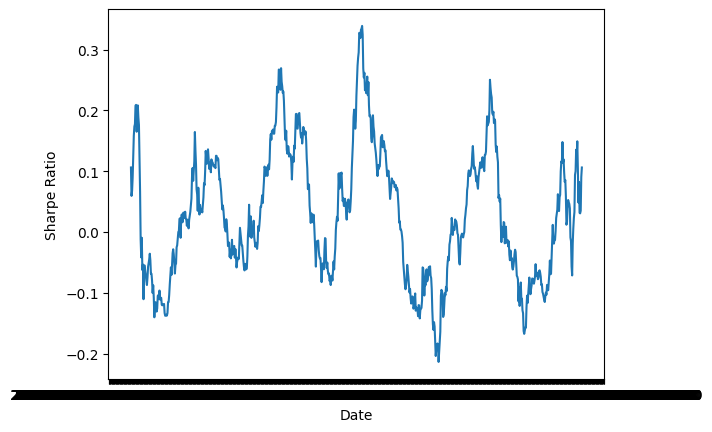

In [3]:
stockname = '00DS30'
df = get_prices(stockname, path=datadir) 
returns = get_returns(dataframe=df, field='close')
running_sharpe = returns.rolling(90).apply(sharpe_ratio) 

#plotting
_, ax1 = plt.subplots()
ax1.plot(running_sharpe[90:-100]);
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio');

Mean of running Sharpe ratio: 0.02861458918747366
std of running Sharpe ratio: 0.1077267779426103


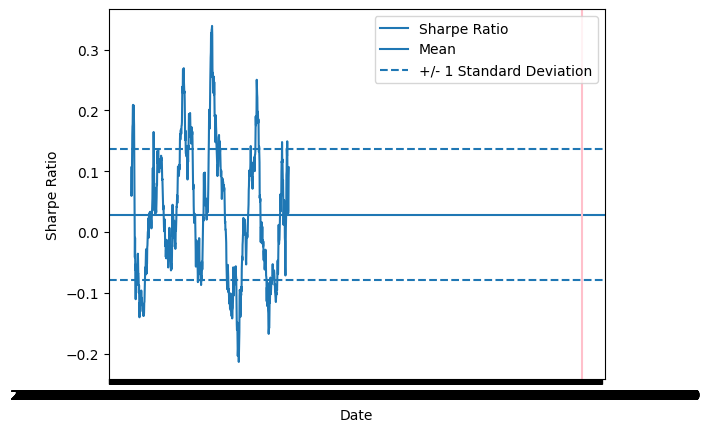

In [4]:
mean_rs = np.mean(running_sharpe[90:-100])
std_rs = np.std(running_sharpe[90:-100])

# Plot running Sharpe ratio
_, ax2 = plt.subplots()
ax2.plot(running_sharpe[90:])

# Plot its mean and the +/- 1 standard deviation lines
ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs, linestyle='--')
ax2.axhline(mean_rs - std_rs, linestyle='--')

# Indicate where we computed the mean and standard deviations
# Everything after this is 'out of sample' which we are comparing with the estimated mean and std
ax2.axvline(returns.index[-100], color='pink');
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

print('Mean of running Sharpe ratio:', mean_rs)
print('std of running Sharpe ratio:', std_rs)

### Moving Avg.

Mean of rolling mean: 1698.809214099526
std of rolling mean: 110.57920706932966


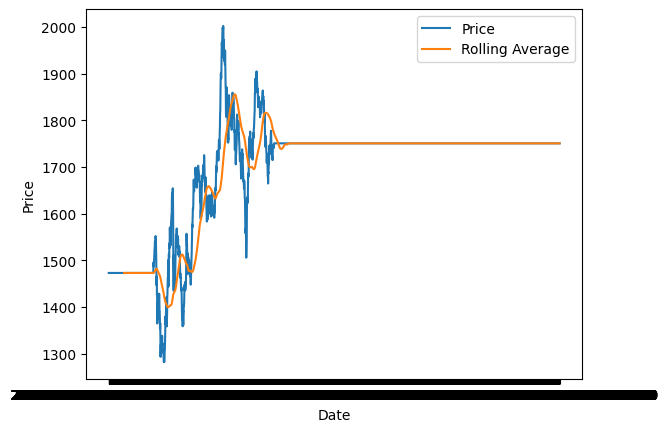

In [6]:
# Compute the rolling mean for each day
mu = df.close.rolling(window=90).mean()

# Plot pricing data
_, ax1 = plt.subplots()
ax1.plot(df.close) 
plt.ylabel('Price')
plt.xlabel('Date')

# Plot rolling mean
ax1.plot(mu);
plt.legend(['Price','Rolling Average']);

print('Mean of rolling mean:', np.mean(mu))
print('std of rolling mean:', np.std(mu))

Mean of rolling std: 20.863079527290513
std of rolling std: 35.27895932231744


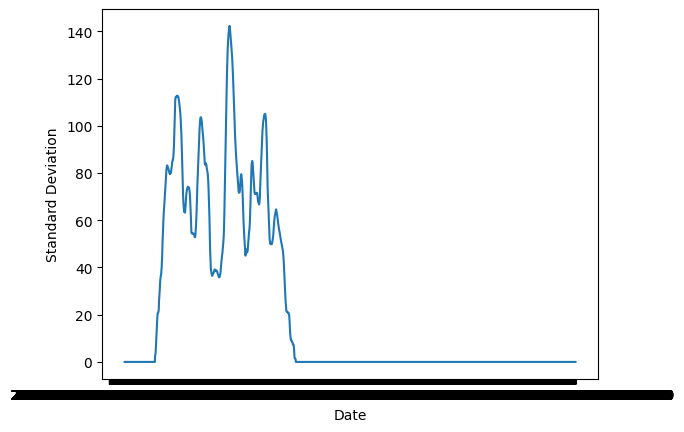

In [7]:
# Compute rolling standard deviation
std = df.close.rolling(window=90).std()

# Plot rolling std
_, ax2 = plt.subplots()
ax2.plot(std)
plt.ylabel('Standard Deviation')
plt.xlabel('Date')

print('Mean of rolling std:', np.mean(std))
print('std of rolling std:', np.std(std))

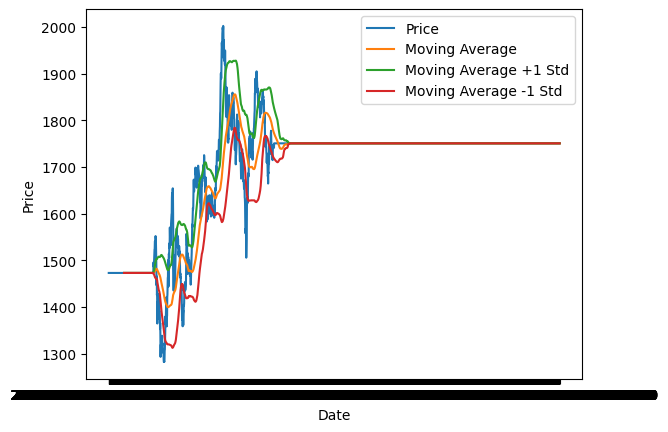

In [9]:
# Plot original data
_, ax3 = plt.subplots()
ax3.plot(df.close)

# Plot Bollinger bands
ax3.plot(mu)
ax3.plot(mu + std)
ax3.plot(mu - std);
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Price', 'Moving Average', 'Moving Average +1 Std', 'Moving Average -1 Std'])
plt.show()